# Übung 5

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# Aufgabe 1

## Beobachtungen - Impirische Daten

### Daten einlesen

In [302]:
# Beobachtungen, Exponential, Pareto bitte jeweils einsetzen in 'sheet_name'!
data = pd.read_excel("./Ü5-HA-Hazardraten-Daten.xlsx",sheet_name="Beobachtungen")

### (a)

In [303]:
# (i)
print("P(x > 40) = ", (1 -  sum(data["Gestorbene (Anteil)"][0:40])) * 100, "%") 
# print((data["Überlebende (Anteil)"][40]) * 100)
# (ii)
print("P(X = 40) = ", 100 * data["Gestorbene (Anteil)"][40], "%")

P(x > 40) =  98.14051563822511 %
P(X = 40) =  0.12836006321060958 %


### (b)

In [304]:
data['Gestorbene_b)'] = data["Gestorbene"] / 10**5
# Lukas: Gestorbenen (Anteil)
fig = px.bar(data, x='Alter', y='Gestorbene_b)', 
             labels={'Wahrscheinlichkeit': 'Wahrscheinlichkeit zu sterben'})

fig.update_layout(title='Häufigkeitsdiagramm der Sterbewahrscheinlichkeiten', 
                  xaxis_title='Alter', yaxis_title='Wahrscheinlichkeit',width=700, height=800)
fig.show()

### (c)

In [305]:
data['Gewichtetes_Alter'] = data['Alter'] * data['Gestorbene (Anteil)']
Ew = data["Gewichtetes_Alter"].sum()
print("Erwarteter Lebensalter EX:", Ew)

Erwarteter Lebensalter EX: 77.51313246500825


### (d)

In [306]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=data["Alter"], x=data["Überlebende (Anteil)"], mode='lines+markers', name='Überlebensrate'))
fig.update_layout(
    title="Caplan Mayer Kurve - Häufigkeitsdiagramm",
    xaxis_title="Alter",
    yaxis_title="Überlebensrate",
    width=500, height=700
)

fig.show()

### (e)

In [307]:
data["Wahrscheinlichkeit"] = data["Gestorbene"] / data["Überlebende"]

# Berechne die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 wird
s_40 = 1 - data.loc[40, 'Wahrscheinlichkeit']

print(f'Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 Jahre alt wird, beträgt: {s_40}')


Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 Jahre alt wird, beträgt: 0.9986920787772934


### (f)

In [308]:
h_40 = data.loc[40, 'Wahrscheinlichkeit']

print(f'Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, im genau 41. Lebensjahr stirbt, beträgt: {h_40 * 100}')

Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, im genau 41. Lebensjahr stirbt, beträgt: 0.13079212227066608


### (g)

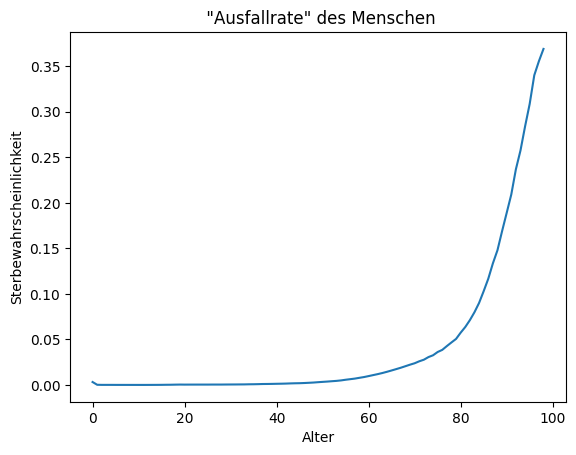

In [309]:
h_k = data['Wahrscheinlichkeit']

plt.plot(data['Alter'][0:99], h_k[0:99])
plt.xlabel('Alter')
plt.ylabel('Sterbewahrscheinlichkeit')
plt.title(' "Ausfallrate" des Menschen')
plt.show()

# Aufgabe 2

In [310]:
def exponential_verteilung(x, lamb):
    if x >= 0:
        return lamb * np.exp(-lamb*x)
    else:
        raise ValueError("Only values greater or equal zero")
    
lamb = 3
x_values = np.linspace(0, 1, 100)
y_values = [exponential_verteilung(x, lamb) for x in x_values]


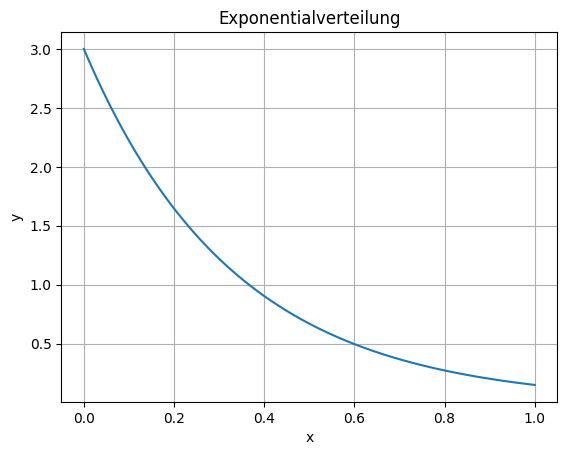

In [311]:
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Exponentialverteilung")
plt.show()

## Aufgabe 3